In [1]:
import pandas as pd 
import os 
import requests
import json 
import matplotlib.pyplot as plt

In [2]:
nyc_arrests=pd.read_csv('data/NYC_Arrests.csv')
nyc_arrests

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,173130602,12/31/2017,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638
1,173114463,12/31/2017,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241
2,173113513,12/31/2017,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572
3,173113423,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074
4,173113421,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811
5,173130583,12/31/2017,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085
6,173129349,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122
7,173128438,12/31/2017,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112
8,173128437,12/31/2017,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752
9,173128433,12/31/2017,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936


In [3]:
nyc_date=pd.concat([nyc_arrests.drop('ARREST_DATE', axis = 1), 
          (nyc_arrests.ARREST_DATE.str.split("/|T").str[:3].apply(pd.Series)
          .rename(columns={0:'month', 1:'day', 2:'year'}))], axis = 1)
nyc_date

,ARREST_KEY,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,month,day,year
0,173130602,566.0,"MARIJUANA, POSSESSION",678.0,MISCELLANEOUS PENAL LAW,PL 2210500,V,Q,105,0.0,25-44,M,BLACK,1063056.0,207463.0,40.735772,-73.715638,12,31,2017
1,173114463,478.0,"THEFT OF SERVICES, UNCLASSIFIED",343.0,OTHER OFFENSES RELATED TO THEFT,PL 1651503,M,Q,114,0.0,25-44,M,ASIAN / PACIFIC ISLANDER,1009113.0,219613.0,40.769437,-73.910241,12,31,2017
2,173113513,849.0,"NY STATE LAWS,UNCLASSIFIED VIOLATION",677.0,OTHER STATE LAWS,LOC000000V,V,K,73,1.0,18-24,M,BLACK,1010719.0,186857.0,40.679525,-73.904572,12,31,2017
3,173113423,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,25-44,M,WHITE,987831.0,217446.0,40.763523,-73.987074,12,31,2017
4,173113421,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,18,0.0,45-64,M,BLACK,987073.0,216078.0,40.759768,-73.989811,12,31,2017
5,173130583,397.0,"ROBBERY,UNCLASSIFIED,OPEN AREAS",105.0,ROBBERY,PL 1601001,F,K,73,0.0,18-24,M,BLACK,1007524.0,188555.0,40.684194,-73.916085,12,31,2017
6,173129349,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,9,0.0,18-24,F,WHITE HISPANIC,990592.0,202391.0,40.722199,-73.977122,12,31,2017
7,173128438,511.0,"CONTROLLED SUBSTANCE, POSSESSION 7",235.0,DANGEROUS DRUGS,PL 2200300,M,M,25,0.0,25-44,M,BLACK,999724.0,230625.0,40.799683,-73.944112,12,31,2017
8,173128437,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,M,23,2.0,25-44,M,BLACK HISPANIC,998165.0,226184.0,40.787496,-73.949752,12,31,2017
9,173128433,705.0,"FORGERY,ETC.-MISD.",358.0,OFFENSES INVOLVING FRAUD,PL 1702000,M,M,17,0.0,18-24,M,WHITE,991195.0,212559.0,40.750107,-73.974936,12,31,2017


In [5]:
brooklyn_arrests=nyc_date.loc[nyc_date['ARREST_BORO']=='K']
queens_arrests=nyc_date.loc[nyc_date['ARREST_BORO']=='Q']

In [7]:
brooklyn_data=brooklyn_arrests.rename(columns={'ARREST_KEY':'Arrest Key','OFNS_DESC':'Type of Offense',
                                           'ARREST_BORO':'Borough','year':'Year'})
brooklyn_data=brooklyn_data[['Arrest Key','Type of Offense','Year']]
brooklyn_data.head()

,Arrest Key,Type of Offense,Year
2,173113513,OTHER STATE LAWS,2017
5,173130583,ROBBERY,2017
10,173128430,ASSAULT 3 & RELATED OFFENSES,2017
11,173128428,PETIT LARCENY,2017
12,173126364,FELONY ASSAULT,2017


In [8]:
queens_data=queens_arrests.rename(columns={'ARREST_KEY':'Arrest Key','OFNS_DESC':'Type of Offense',
                                           'ARREST_BORO':'Borough','year':'Year'})
queens_data=queens_data[['Arrest Key','Type of Offense','Year']]
queens_data.head()

,Arrest Key,Type of Offense,Year
0,173130602,MISCELLANEOUS PENAL LAW,2017
1,173114463,OTHER OFFENSES RELATED TO THEFT,2017
13,173124321,DANGEROUS DRUGS,2017
17,173117305,OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV,2017
18,173116160,INTOXICATED/IMPAIRED DRIVING,2017


In [16]:
queens_data['Type of Offense'].unique()

array(['MISCELLANEOUS PENAL LAW', 'OTHER OFFENSES RELATED TO THEFT',
       'DANGEROUS DRUGS', 'OFF. AGNST PUB ORD SENSBLTY & RGHTS TO PRIV',
       'INTOXICATED/IMPAIRED DRIVING', 'INTOXICATED & IMPAIRED DRIVING',
       'FELONY ASSAULT', 'VEHICLE AND TRAFFIC LAWS', 'PETIT LARCENY',
       'ROBBERY', 'BURGLARY', 'ASSAULT 3 & RELATED OFFENSES',
       'CRIMINAL MISCHIEF & RELATED OFFENSES', 'SEX CRIMES',
       'OFFENSES AGAINST PUBLIC ADMINISTRATION', "BURGLAR'S TOOLS",
       'DANGEROUS WEAPONS', 'ALCOHOLIC BEVERAGE CONTROL LAW',
       'GRAND LARCENY', 'UNAUTHORIZED USE OF A VEHICLE 3 (UUV)',
       'FORGERY', 'OTHER STATE LAWS (NON PENAL LAW)',
       'OTHER TRAFFIC INFRACTION', 'OFF. AGNST PUB ORD SENSBLTY &',
       'POSSESSION OF STOLEN PROPERTY 5', 'FRAUDS', 'ADMINISTRATIVE CODE',
       'OFFENSES AGAINST THE PERSON', 'RAPE', nan, 'CRIMINAL TRESPASS',
       'FORCIBLE TOUCHING', 'GRAND LARCENY OF MOTOR VEHICLE',
       'OTHER STATE LAWS', 'MURDER & NON-NEGL. MANSLAUGHTER',
    

In [9]:
bk_burglaries=brooklyn_data[brooklyn_data['Type of Offense']=='BURGLARY'].groupby([brooklyn_data['Year']])
qns_burglaries=queens_data[queens_data['Type of Offense']=='BURGLARY'].groupby([queens_data['Year']])

In [10]:
burglary_total=bk_burglaries['Arrest Key'].count()
burglary_total

Year
2006    1361
2007    1552
2008    1477
2009    1369
2010    1482
2011    1622
2012    1690
2013    1698
2014    1551
2015    1400
2016    1398
2017    1268
2018    1395
Name: Arrest Key, dtype: int64

In [11]:
qnsburg_total=qns_burglaries['Arrest Key'].count()
qnsburg_total

Year
2006     906
2007     986
2008    1044
2009     968
2010    1029
2011    1023
2012    1110
2013    1216
2014    1078
2015     992
2016     894
2017     820
2018     737
Name: Arrest Key, dtype: int64

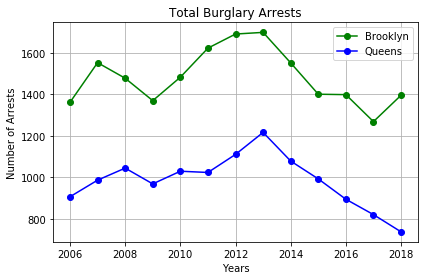

In [44]:

years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(years, burglary_total, color="green", label="Brooklyn",marker='o')
plt.plot(years, qnsburg_total, color="blue", label="Queens",marker='o')

plt.legend(loc="best")
plt.grid()
plt.title('Total Burglary Arrests')
plt.xlabel("Years")
plt.ylabel("Number of Arrests")
plt.tight_layout()
plt.savefig('data/bkqnsburg')

In [17]:
bk_drugs=brooklyn_data[brooklyn_data['Type of Offense']=='DANGEROUS DRUGS'].groupby([brooklyn_data['Year']])
qns_drugs=queens_data[queens_data['Type of Offense']=='DANGEROUS DRUGS'].groupby([queens_data['Year']])

In [19]:
qns_drug_total=qns_drugs['Arrest Key'].count()
qns_drug_total

Year
2006    12477
2007    13360
2008    13394
2009    13141
2010    13654
2011    13707
2012    11748
2013    11462
2014    10760
2015     8095
2016     7341
2017     7401
2018     4931
Name: Arrest Key, dtype: int64

In [20]:
bk_drugs_total=bk_drugs['Arrest Key'].count()
bk_drugs_total

Year
2006    31003
2007    35899
2008    32119
2009    34427
2010    33625
2011    33624
2012    27317
2013    21903
2014    19754
2015    14610
2016    13274
2017    14029
2018     9678
Name: Arrest Key, dtype: int64

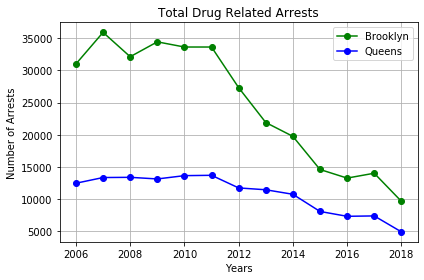

In [43]:
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(years, bk_drugs_total, color="green", label="Brooklyn",marker='o')
plt.plot(years, qns_drug_total, color="blue", label="Queens",marker='o')

plt.legend(loc="best")
plt.grid()
plt.title('Total Drug Related Arrests')
plt.xlabel("Years")
plt.ylabel("Number of Arrests")

plt.tight_layout()
plt.savefig('data/bkqnsdrug')

In [31]:
bk_rape=brooklyn_data[brooklyn_data['Type of Offense']=='RAPE'].groupby([brooklyn_data['Year']])
qns_rape=queens_data[queens_data['Type of Offense']=='RAPE'].groupby([queens_data['Year']])

In [32]:
qns_rape_total=qns_rape['Arrest Key'].count()
bk_rape_total=bk_rape['Arrest Key'].count()

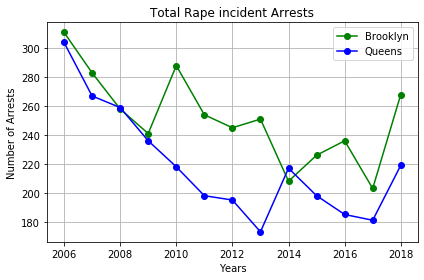

In [42]:
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(years, bk_rape_total, color="green", label="Brooklyn",marker='o')
plt.plot(years, qns_rape_total, color="blue", label="Queens",marker='o')

plt.legend(loc="best")
plt.grid()
plt.title('Total Rape incident Arrests')
plt.xlabel("Years")
plt.ylabel("Number of Arrests")

plt.tight_layout()
plt.savefig('data/bkqnsrape')

In [34]:
bk_murd=brooklyn_data[brooklyn_data['Type of Offense']=='MURDER & NON-NEGL. MANSLAUGHTER'].groupby([brooklyn_data['Year']])
qns_murd=queens_data[queens_data['Type of Offense']=='MURDER & NON-NEGL. MANSLAUGHTER'].groupby([queens_data['Year']])

In [35]:
qns_murd_total=qns_murd['Arrest Key'].count()
bk_murd_total=bk_murd['Arrest Key'].count()

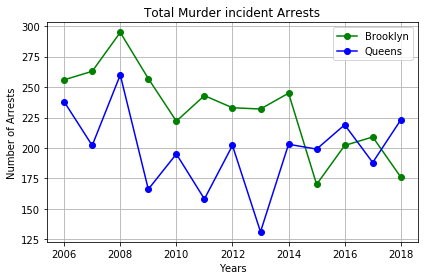

In [40]:
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(years, bk_murd_total, color="green", label="Brooklyn",marker='o')
plt.plot(years, qns_murd_total, color="blue", label="Queens",marker='o')

plt.legend(loc="best")
plt.grid()
plt.title('Total Murder incident Arrests')
plt.xlabel("Years")
plt.ylabel("Number of Arrests")
plt.tight_layout()
plt.savefig('data/bkqnsmurd')


In [37]:
bk_rob=brooklyn_data[brooklyn_data['Type of Offense']=='ROBBERY'].groupby([brooklyn_data['Year']])
qns_rob=queens_data[queens_data['Type of Offense']=='ROBBERY'].groupby([queens_data['Year']])

In [38]:
qns_rob_total=qns_rob['Arrest Key'].count()
bk_rob_total=bk_rob['Arrest Key'].count()

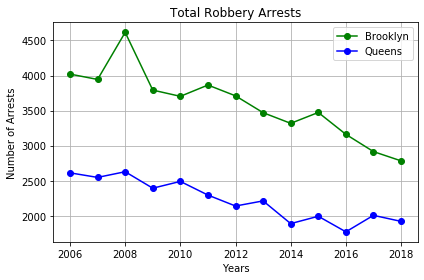

In [41]:
years = [2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018]
plt.plot(years, bk_rob_total, color="green", label="Brooklyn",marker='o')
plt.plot(years, qns_rob_total, color="blue", label="Queens",marker='o')

plt.legend(loc="best")
plt.grid()
plt.title('Total Robbery Arrests')
plt.xlabel("Years")
plt.ylabel("Number of Arrests")

plt.tight_layout()
plt.savefig('data/bkqnsrob')